👉 This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

Objectives of Notebook 📌¶

👉 This notebook aims to:

    
  Build various ML models that can predict drug type.

👨‍💻 The machine learning models used in this project are:

    Linear Logistic Regression
    Linear Support Vector Machine (SVM)
    K Neighbours
    Naive Bayes (Categorical & Gaussian)
    Decision Tree
    Random Forest


In [1]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv


--2024-04-19 09:09:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-04-19 09:09:20 (1.79 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('drug200.csv')
data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
# verify that there are no null columns in the dataset
data[data.isnull().any(axis=1)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']
numerical = [var for var in data.columns if data[var].dtype!='O']

In [ ]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 4 categorical variables : 
 ['Sex', 'BP', 'Cholesterol', 'Drug']


LABEL ENCODING


In [4]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the data
data['Sex'] = encoder.fit_transform(data['Sex'])
data['BP'] =encoder.fit_transform(data['BP'])
data['Cholesterol']=encoder.fit_transform(data['Cholesterol'])
data['Drug']=encoder.fit_transform(data['Drug'])


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


Selecting Feature

In [5]:
#split dataset in features and target variable
y = data.Drug # Target variable
X=data.drop(['Drug'],axis=1)

In [ ]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [ ]:
y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int64

Splitting data

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

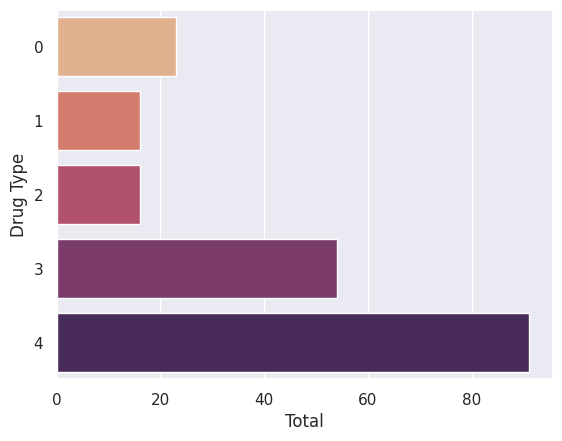

In [7]:
#Drug Type Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", hue="Drug",data=data, palette="flare",legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

SMOTE Technique

In [8]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

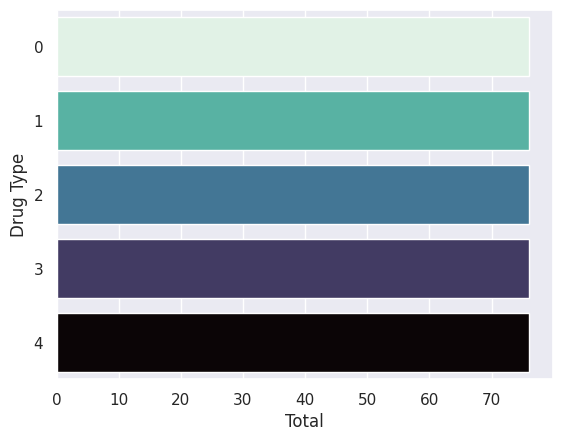

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,hue=y_train, data=data, palette="mako_r",legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of drug type are now balanced.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) # apply on whole x data
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 1.35935443, -0.69597055,  1.72698354,  1.73205081, -0.93190079],
       [ 0.73474175, -0.69597055,  0.4012184 , -0.57735027, -0.31220831],
       [-0.3270998 ,  1.43684242,  1.72698354, -0.57735027,  0.47619814],
       ...,
       [-0.3270998 ,  1.43684242,  0.4012184 ,  1.73205081,  0.11186416],
       [ 1.54673823, -0.69597055,  0.4012184 , -0.57735027, -0.3634664 ],
       [-0.3270998 , -0.69597055,  1.72698354, -0.57735027, -0.62089748]])

In [10]:
X_test

array([[-0.45202233,  1.43684242,  0.4012184 ,  1.73205081,  0.61142006],
       [-1.32648008, -0.69597055, -0.92454675, -0.57735027,  2.15724833],
       [-0.13971599,  1.43684242, -0.92454675,  1.73205081, -0.09746516],
       [-0.63940614,  1.43684242, -0.92454675, -0.57735027,  0.96586267],
       [-0.57694487,  1.43684242,  0.4012184 ,  1.73205081, -0.7415155 ],
       [-1.01417374, -0.69597055,  1.72698354, -0.57735027, -0.07722665],
       [-0.20217726, -0.69597055,  1.72698354,  1.73205081,  1.71844874],
       [-0.20217726,  1.43684242,  0.4012184 , -0.57735027, -0.4071323 ],
       [ 0.04766781,  1.43684242,  0.4012184 , -0.57735027,  0.83117806],
       [ 0.29751288,  1.43684242,  0.4012184 ,  1.73205081, -0.41125164],
       [ 1.10950936,  1.43684242,  1.72698354, -0.57735027,  0.58813681],
       [ 0.85966429, -0.69597055,  0.4012184 , -0.57735027,  4.4662297 ],
       [ 1.48427697, -0.69597055, -0.92454675,  1.73205081, -0.55901069],
       [-0.13971599, -0.69597055, -0.9

Model Development and Prediction

LOGISTIC REGRESSION

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', max_iter=5000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [14]:
# import the metrics class
from sklearn import metrics

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 5,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 1,  0,  0,  0, 14]])

In [15]:
from sklearn.metrics import classification_report,accuracy_score
target_names = [' Drug A', 'Drug B', 'Drug C', 'Drug X','Drug Y']
print(classification_report(y_test, y_pred,target_names =target_names ))


lr = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr*100))


              precision    recall  f1-score   support

      Drug A       0.83      1.00      0.91         5
      Drug B       1.00      1.00      1.00         4
      Drug C       1.00      1.00      1.00         3
      Drug X       1.00      1.00      1.00        13
      Drug Y       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.97      0.99      0.97        40
weighted avg       0.98      0.97      0.98        40

Logistic Regression accuracy is: 97.50%


K Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
Kclassifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
Kclassifier.fit(X_train, y_train)
y_pred = Kclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))




              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.67      0.50      0.57         4
           2       1.00      1.00      1.00         3
           3       0.86      0.92      0.89        13
           4       1.00      0.93      0.97        15

    accuracy                           0.90        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.90      0.90      0.90        40

[[ 5  0  0  0  0]
 [ 1  2  0  1  0]
 [ 0  0  3  0  0]
 [ 0  1  0 12  0]
 [ 0  0  0  1 14]]
K Neighbours accuracy is: 90.00%


SVM

In [17]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 15]]
SVC accuracy is: 100.00%


Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
Dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dclassifier.fit(X_train, y_train)
y_pred=Dclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
target_names = [' Drug A', 'Drug B', 'Drug C', 'Drug X','Drug Y']
print(classification_report(y_test, y_pred,target_names=target_names))
print(confusion_matrix)

dt = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dt*100))


              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00         5
      Drug B       1.00      1.00      1.00         4
      Drug C       1.00      0.67      0.80         3
      Drug X       0.92      0.92      0.92        13
      Drug Y       0.94      1.00      0.97        15

    accuracy                           0.95        40
   macro avg       0.97      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Decision Tree accuracy is: 95.00%


Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFclass=RandomForestClassifier()
RFclass.fit(X_train,y_train)
y_pred=RFclass.predict(X_test)

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
RFac=accuracy_score(y_pred,y_test)
print("Random Forest accuracy is: {:.2f}%".format(RFac*100))

              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00         5
      Drug B       1.00      1.00      1.00         4
      Drug C       1.00      1.00      1.00         3
      Drug X       1.00      0.92      0.96        13
      Drug Y       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Random Forest accuracy is: 97.50%


Naive Bayes

Categorical NB


In [20]:
import numpy as np
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()

# Find the indices of negative values in X_train
negative_indices = np.where(X_train < 0)

# Replace negative values with zeros
X_train[negative_indices] = 0

# Find the indices of negative values in X_train
negative_indices = np.where(X_test < 0)

# Replace negative values with zeros
X_test[negative_indices] = 0

NBclassifier1.fit(X_train, y_train)
y_pred = NBclassifier1.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.33      0.50      0.40         4
           2       0.00      0.00      0.00         3
           3       0.53      0.77      0.62        13
           4       1.00      0.60      0.75        15

    accuracy                           0.55        40
   macro avg       0.41      0.41      0.40        40
weighted avg       0.60      0.55      0.55        40

[[ 1  0  0  4  0]
 [ 0  2  0  2  0]
 [ 2  1  0  0  0]
 [ 0  3  0 10  0]
 [ 2  0  1  3  9]]
Naive Bayes accuracy is: 55.00%


Gaussian NB

In [21]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()

NBclassifier2.fit(X_train, y_train)
y_pred = NBclassifier2.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      0.92      0.96        13
           4       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Naive Bayes accuracy is: 97.50%


Model Comparision

In [31]:
import pandas as pd

# Define the data
data = {
        'Model': ['Linear regression', 'K neighbours',' SVM', 'Decision Tree', 'Random Forest', 'Categorical NB', 'Gaussian NB'],
        'Accuracy': [lr*100, KNAcc*100, SVCAcc*100, dt*100, RFac*100, NBAcc1*100,NBAcc2*100]}

# Create the DataFrame
df = pd.DataFrame(data)
#Display the the dataframe
print(df.sort_values(by='Accuracy',ascending=False))


               Model  Accuracy
2                SVM     100.0
0  Linear regression      97.5
4      Random Forest      97.5
6        Gaussian NB      97.5
3      Decision Tree      95.0
1       K neighbours      90.0
5     Categorical NB      55.0


👉 From the results, it can be seen that most of ML models can reach more than  90% accuracy in predicting classification of drug type.